In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from math import sqrt

In [62]:
def Transform(arr, a, T):
    return a*arr + np.array(T)

In [63]:
def f(n):
    if n == 1:
        return np.array([[0],[0]])
    else:
        identical = Transform(f(n-1), 1/2, [[0],[0]])
        horizontal = Transform(f(n-1), 1/2, [[1/2],[0]])
        diagonal = Transform(f(n-1), 1/2, [[1/4],[sqrt(3)/4]])
        return np.hstack((identical, horizontal, diagonal))

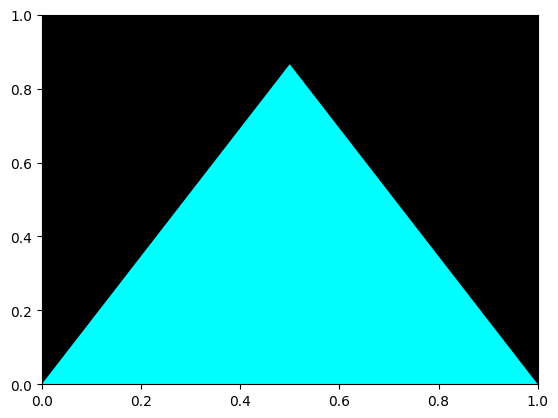

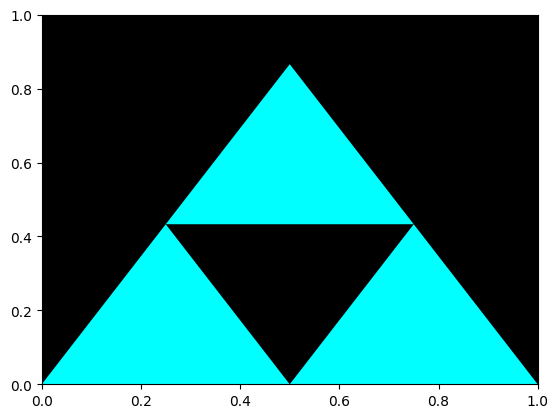

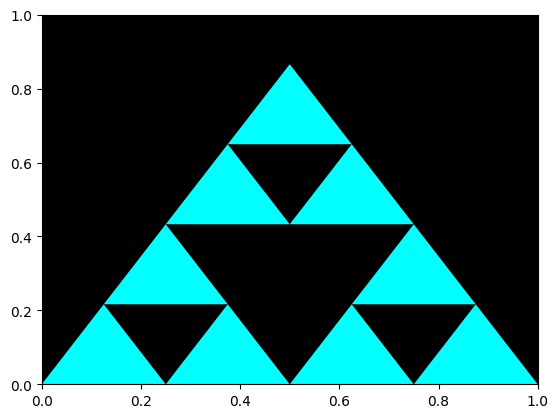

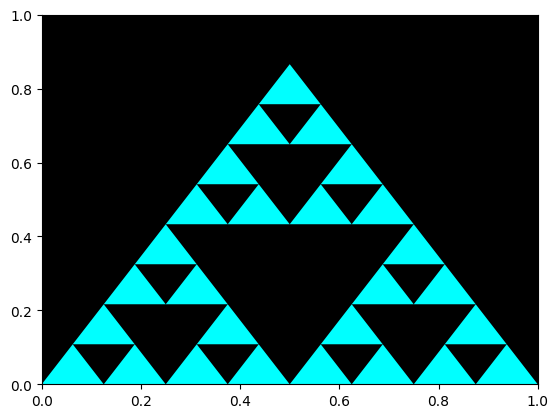

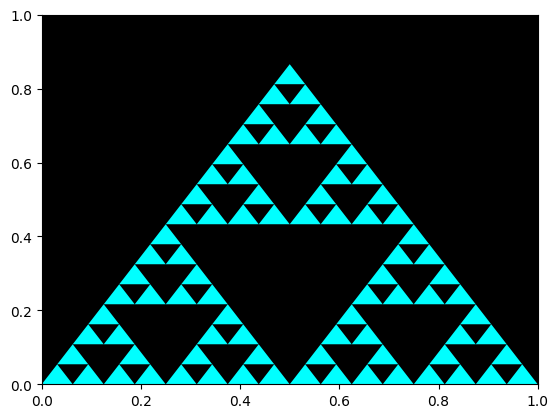

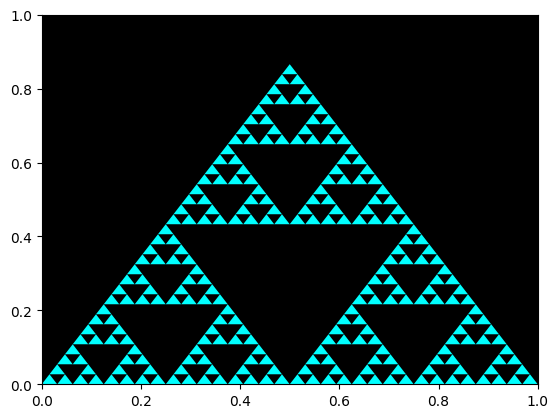

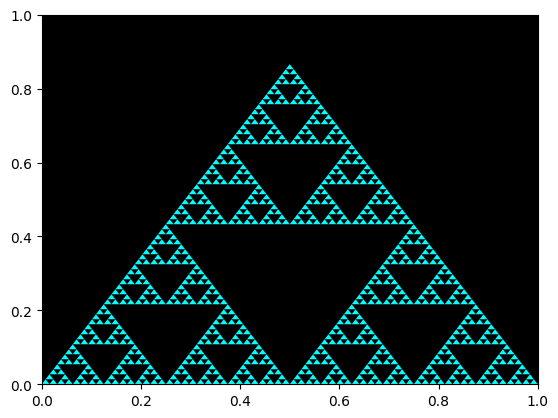

In [64]:
n = int(input())
for i in range(1,n+1):
    patches = []
    bottom_left_vertices = np.transpose(f(i))
    bottom_right_vertices = np.transpose(f(i) + np.array([[(1/2)**(i-1)],[0]]))
    top_vertices = np.transpose(f(i) + np.array([[(1/2)**i],[(1/2)**i*sqrt(3)]]))
    for counter in range(f(i).shape[1]):
        triangle_vertices = np.array([bottom_left_vertices[counter,:], bottom_right_vertices[counter,:], top_vertices[counter,:]])
        patch = Polygon(triangle_vertices, closed=True)
        patches.append(patch)
    collection = PatchCollection(patches, facecolor='cyan')
    fig, ax = plt.subplots()
    ax.set_facecolor('black')
    ax.add_collection(collection)
    plt.show()